O(identity())
└── A(rotz(20)*transl(1,0,0))
    └── B(rotz(80))


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa1c6b71e50>,
 [([0.0, 0.0], [1.0, 0.0], [0.0, 1.0]),
  ([0.9396926207859084, 0.3420201433256687],
   [1.8793852415718169, 0.6840402866513374],
   [0.5976724774602398, 1.281712764111577]),
  ([0.9396926207859084, 0.3420201433256687],
   [0.7660444431189781, 1.3268278963378768],
   [-0.0451151322262997, 0.16837196565873846])])

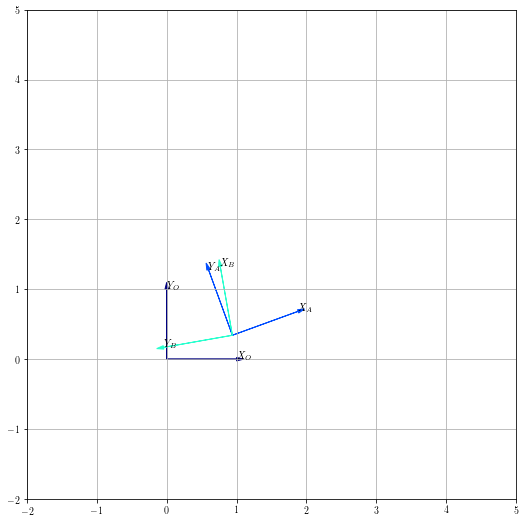

In [1]:
%matplotlib inline  
from frames import Frame, TransformationTree

    
tt = TransformationTree()
A = Frame("A", transf="rotz(20)*transl(1,0,0)", parent=tt.root)
B = Frame("B", transf="rotz(80)", parent=A)

print tt

tt.plot_frames()

Now let's check for some rotations:

O(identity())
└── A10(rotz(10))
    └── A20(rotz(20))


(<matplotlib.axes._subplots.AxesSubplot at 0x7fa1c4b1acd0>,
 [([0.0, 0.0], [1.0, 0.0], [0.0, 1.0]),
  ([0.0, 0.0],
   [0.984807753012208, 0.17364817766693033],
   [-0.17364817766693033, 0.984807753012208]),
  ([0.0, 0.0], [0.8660254037844387, 0.5], [-0.5, 0.8660254037844387])])

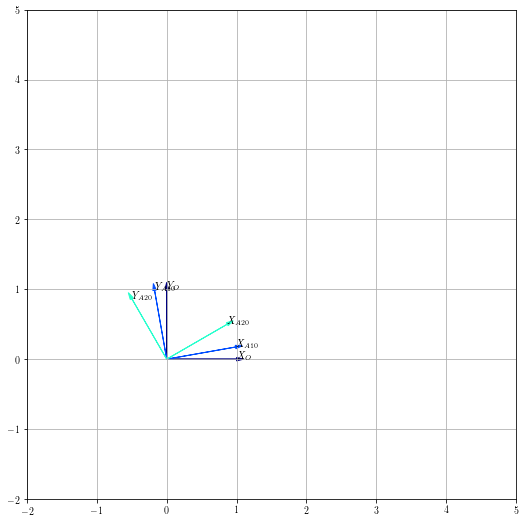

In [2]:
tt = TransformationTree()
p = tt.root
#A = Frame("A", transf="rotz(90)", parent=p)

for x in range(10,30,10):
    A = Frame("A%d"%x, transf="rotz(%d)"%x, parent=p)
    p = A

print tt

tt.plot_frames()

New transf transl(1.00,.0,.0)*rotz(-10.00)
New transf transl(2.00,.0,.0)*rotz(10.00)
O(identity())
└── l0(rotz(45.00))
    └── l1(transl(1.00,.0,.0)*rotz(-10.00))
        └── l2(transl(2.00,.0,.0)*rotz(10.00))


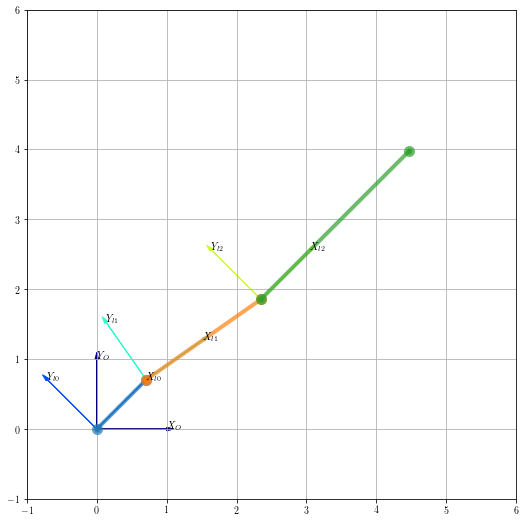

In [3]:
from links import MultiLink

l1 = 1.0; a1 = 45.0
l2 = 2.0; a2 = -10.0
l3 = 3.0; a3 = 10.0
arm = MultiLink()
link1 = arm.addLink(l1, a1)
link2 = arm.addLink(l2, a2)
link3 = arm.addLink(l3, a3)
print arm.tt

arm.plotLinks()

